# Pulse Analysis

We are given a smooth pulse that is supposed to implement a CZ gate in the perfect Rydberg blockade regime. Here, we analyze its performance.

In [1]:
# %pip install -q --progress-bar off rydopt # Uncomment for installation on Colab

import rydopt as ro
import numpy as np

First, we create the target gate, by specifying the gate phases, the interaction between the atoms and the Rydberg-state decay rate.

In [2]:
gate = ro.gates.TwoQubitGate(phi=None, theta=np.pi, Vnn=float("inf"), decay=0.0001)

The pulse ansatz we use consists of a constant detuning and a sweep of the laser phase. The Rabi frequency amplitude is constant and fixed.

In [3]:
pulse_ansatz = ro.pulses.PulseAnsatz(
    detuning_ansatz=ro.pulses.const,
    phase_ansatz=ro.pulses.sin_crab,
    rabi_ansatz=ro.pulses.softbox_seventh_order_smoothstep,
)

The pulse itself is described by six parameters.

In [4]:
pulse_params = (10.551257303347738, [-0.28121562], [0.42764051, 1.24775025], [1.0, 0.5])

We now analyze the performance of the gate pulse using (i) a JAX-based implementation and (ii) a QuTiP-based implementation (as a cross-check):

In [5]:
infidelity, infidelity_nodecay, ryd_time = ro.characterization.analyze_gate(
    gate, pulse_ansatz, pulse_params
)
infidelity_qutip, infidelity_nodecay_qutip, ryd_time_qutip = (
    ro.characterization.analyze_gate_qutip(gate, pulse_ansatz, pulse_params)
)

print(
    f"Gate infidelity:             jax: {infidelity:.4e}, qutip: {infidelity_qutip:.4e}"
)
print(
    f"Gate infidelity (no decay):  jax: {infidelity_nodecay:.4e}, "
    f"qutip: {infidelity_nodecay_qutip:.4e}"
)
print(
    f"Rydberg time:                jax: {ryd_time:.4f},     qutip: {ryd_time_qutip:.4f}"
)

Gate infidelity:             jax: 2.9587e-04, qutip: 2.9587e-04
Gate infidelity (no decay):  jax: 3.1567e-08, qutip: 3.1567e-08
Rydberg time:                jax: 2.9589,     qutip: 2.9586


We see how well the CZ gate performs in the presence and absence of Rydberg-state decay.

Let us plot the pulse profile.

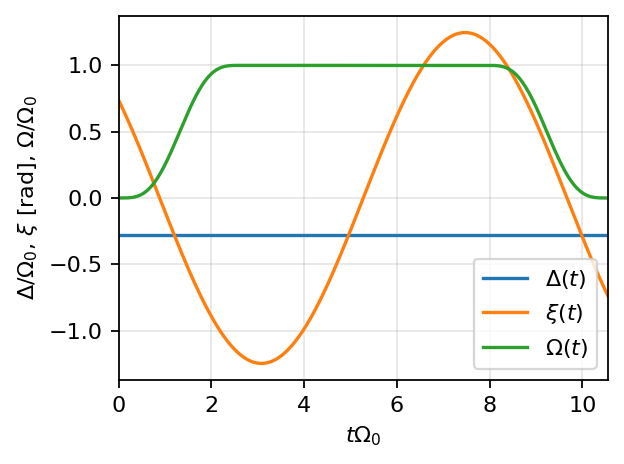

In [6]:
ro.characterization.plot_pulse(pulse_ansatz, pulse_params);

Finally, we show the spectrum.

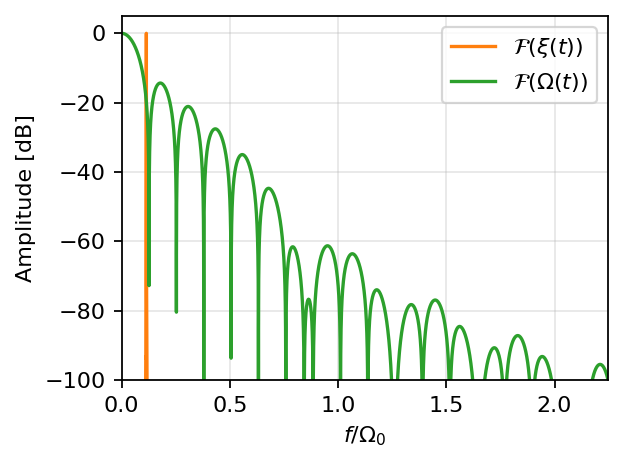

In [7]:
ro.characterization.plot_spectrum(pulse_ansatz, pulse_params);